## Эĸсплораторный анализ данных

### Импорт необходимых модулей и код основных функций

In [1]:
import re
import json
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filepath):
    """Загрузка данных из JSONL файла"""
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

In [2]:
def check_numbering(text):
    """Проверка правильности нумерации предложений"""
    sentences = re.findall(r'\(\d+\)', text)
    numbers = [int(re.search(r'\d+', s).group()) for s in sentences]
    
    # Проверка последовательности
    is_sequential = all(
        numbers[i] + 1 == numbers[i+1] 
        for i in range(len(numbers)-1)
    )
    
    return {
        'has_numbering': bool(sentences),
        'starts_from_1': numbers[0] == 1 if numbers else False,
        'is_sequential': is_sequential,
        'total_sentences': len(sentences)
    }

In [3]:
def analyze_text_lengths(texts):
    """Анализ длины текстов"""
    lengths = [len(text.split()) for text in texts]
    plt.figure(figsize=(10, 5))
    plt.hist(lengths, bins=50, color='skyblue')
    plt.title('Распределение длины текстов (в словах)')
    plt.xlabel('Количество слов')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()
    return pd.Series(lengths).describe()

In [4]:
def analyze_questions(passages):
    """Анализ вопросов"""
    questions = [q['question'] for p in passages for q in p['questions']]
    q_lengths = [len(q.split()) for q in questions]
    
    plt.figure(figsize=(12, 4))
    plt.hist(q_lengths, bins=30, color='lightgreen')
    plt.title('Длина вопросов (слова)')
    plt.xlabel('Слова')
    
    return pd.Series(q_lengths).describe()

In [5]:
def analyze_answers(passages):
    """Анализ ответов"""
    answers = [a for p in passages 
              for q in p['questions'] 
              for a in q['answers']]
    
    # Распределение правильных/неправильных ответов
    labels = [a['label'] for a in answers]
    label_counts = pd.Series(labels).value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(label_counts, labels=['Неправильные', 'Правильные'], 
            autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
    plt.title('Соотношение ответов')
    plt.show()
    
    # Длина ответов
    answer_lengths = [len(a['text'].split()) for a in answers]
    plt.figure(figsize=(10, 4))
    plt.hist(answer_lengths, bins=30, color='salmon')
    plt.title('Длина ответов (слова)')
    plt.xlabel('Слова в ответе')
    plt.ylabel('Частота')
    plt.show()
    
    return {
        'label_distribution': label_counts,
        'answer_length_stats': pd.Series(answer_lengths).describe()
    }

In [6]:
# Загрузка данных
data = load_data('train.jsonl')
df = pd.DataFrame(data)

### Первичный анализ данных

df.head(3)

In [8]:
df.iloc[0]

idx                                                        0
passage    {'text': '(1) Но люди не могут существовать бе...
Name: 0, dtype: object

In [9]:
df.iloc[0]['passage'] 

{'text': '(1) Но люди не могут существовать без природы, поэтому в парке стояли железобетонные скамейки — деревянные моментально ломали. (2) В парке бегали ребятишки, водилась шпана, которая развлекалась игрой в карты, пьянкой, драками, «иногда насмерть». (3) «Имали они тут и девок...» (4) Верховодил шпаной Артемка-мыло, с вспененной белой головой. (5) Людочка сколько ни пыталась усмирить лохмотья на буйной голове Артемки, ничего у неё не получалось. (6) Его «кудри, издали напоминавшие мыльную пену, изблизя оказались что липкие рожки из вокзальной столовой — сварили их, бросили комком в пустую тарелку, так они, слипшиеся, неподъёмно и лежали. (7) Да и не ради причёски приходил парень к Людочке. (8) Как только её руки становились занятыми ножницами и расчёской, Артемка начинал хватать её за разные места. (9) Людочка сначала увёртывалась от хватких рук Артемки, а когда не помогло, стукнула его машинкой по голове и пробила до крови, пришлось лить йод на голову «ухажористого человека». (10

In [10]:
# Проверка нумерации для всех текстов
numbering_results = [check_numbering(p['text']) for p in df['passage']]
numbering_df = pd.DataFrame(numbering_results)
    
print("\nСтатистика нумерации предложений:")
print(f"Текстов с нумерацией: {numbering_df['has_numbering'].sum()}/{len(numbering_df)}")
print(f"Начинаются с 1: {numbering_df['starts_from_1'].sum()}/{len(numbering_df)}")
print(f"Полностью последовательные: {numbering_df['is_sequential'].sum()}/{len(numbering_df)}")
print(f"Среднее число предложений: {numbering_df['total_sentences'].mean():.1f}")
    


Статистика нумерации предложений:
Текстов с нумерацией: 500/500
Начинаются с 1: 500/500
Полностью последовательные: 474/500
Среднее число предложений: 13.8


### Расчёт статистик


1. Анализ текстов:


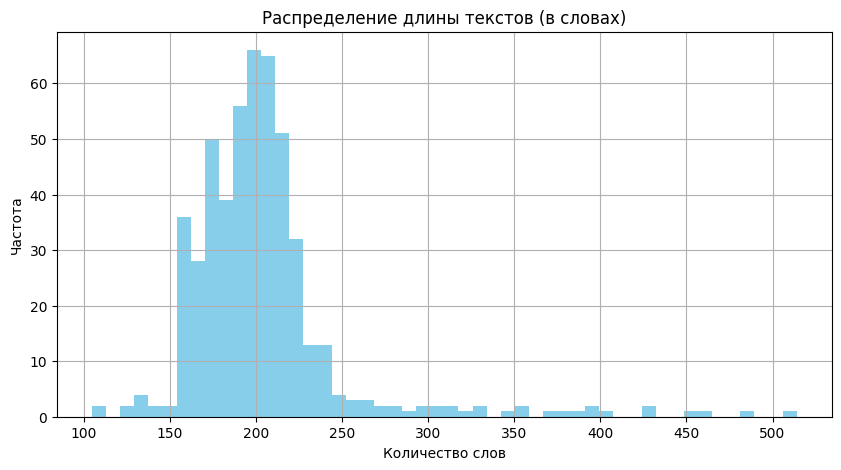

count    500.00000
mean     204.55400
std       47.52195
min      105.00000
25%      178.00000
50%      199.00000
75%      215.00000
max      514.00000
dtype: float64


In [11]:
# Основной анализ
print("\n1. Анализ текстов:")
text_stats = analyze_text_lengths([p['text'] for p in df['passage']])
print(text_stats)


2. Анализ вопросов:
count    2897.000000
mean        7.715568
std         3.390637
min         2.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        27.000000
dtype: float64


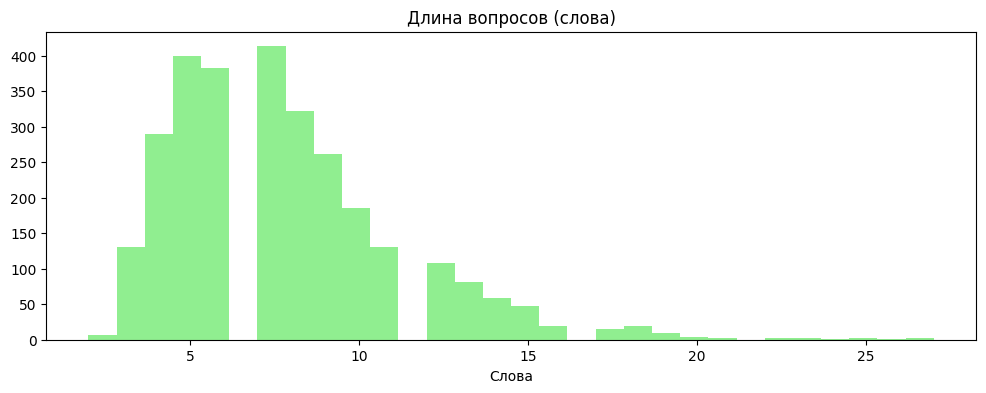

In [12]:
print("\n2. Анализ вопросов:")
question_stats = analyze_questions(df['passage'])
print(question_stats)


3. Анализ ответов:


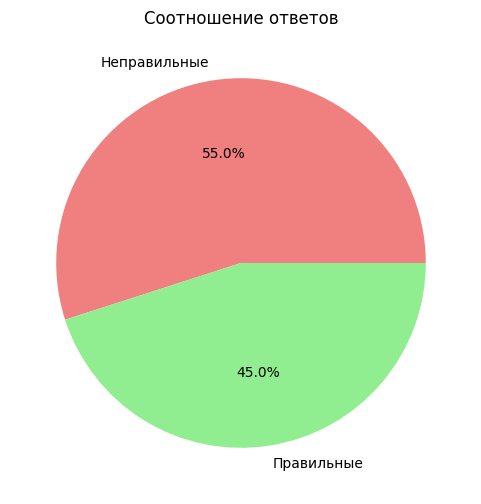

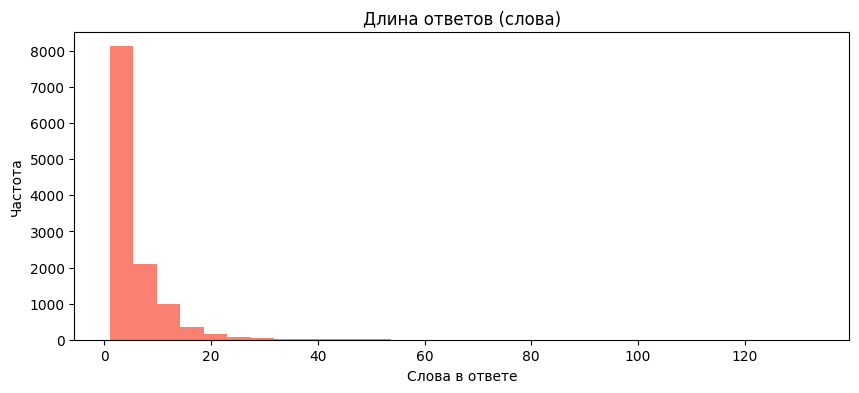

{'label_distribution': 0    6568
1    5382
Name: count, dtype: int64, 'answer_length_stats': count    11950.000000
mean         5.391297
std          5.954695
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        133.000000
dtype: float64}


In [13]:
print("\n3. Анализ ответов:")
answer_stats = analyze_answers(df['passage'])
print(answer_stats)

In [ ]:
# Ввиду небольших по длине текстов и вопросов можно использовать "лёгкие" модели для решения задачи